<a href="https://colab.research.google.com/github/AJSTYLE-lab/Fundamental-of-BIg-Data-Analysis/blob/main/BIG%20DATA%20LABS/LAB%236/L21_7692.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing 
from scipy.cluster.hierarchy import linkage, dendrogram
import math
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
dist = lambda a,b: math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [ ]:
FILE=pd.read_csv("Mall_Customers.csv")
FILE

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
FILE['Genre'] = preprocessing.LabelEncoder().fit_transform(FILE['Genre'])
FILE.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#USING Annual Income (k$) & Spending Score(1-100):

In [ ]:
X = FILE.iloc[:, [3, 4]].values
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
labels = model.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#CONVERTING "Genre" column in 0,1 form(1 for Male and 0 for Female): 

In [ ]:
FILE['Genre'] = preprocessing.LabelEncoder().fit_transform(FILE['Genre'])
FILE.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
n=len(FILE["Annual Income (k$)"])
distance_matrix = np.zeros((n,n))
distance_matrix


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#CALCULATING DISTANCE AND STORE IT INTO MATRIX FORM:

In [ ]:
for i in range(0,n):
    for j in range(i, n):
        distance_matrix[i,j] = dist(X[i], X[j])
        distance_matrix[j,i] = distance_matrix[i,j] 
distance_matrix


array([[  0.        ,  42.        ,  33.01514804, ..., 116.38728453,
        123.79418403, 129.69194269],
       [ 42.        ,   0.        ,  75.00666637, ..., 111.22050171,
        137.3062271 , 122.01639234],
       [ 33.01514804,  75.00666637,   0.        , ..., 129.32130528,
        121.59358536, 143.42245291],
       ...,
       [116.38728453, 111.22050171, 129.32130528, ...,   0.        ,
         57.07013229,  14.2126704 ],
       [123.79418403, 137.3062271 , 121.59358536, ...,  57.07013229,
          0.        ,  65.        ],
       [129.69194269, 122.01639234, 143.42245291, ...,  14.2126704 ,
         65.        ,   0.        ]])

# METHOD:

<ipython-input-68-f775c1b8b163>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single_clustering = linkage(distance_matrix, method="single")


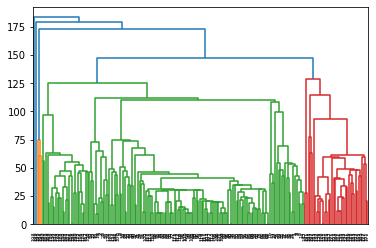

<ipython-input-68-f775c1b8b163>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = linkage(distance_matrix, method="ward")


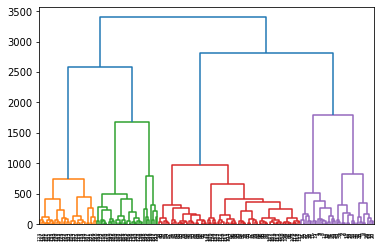

<ipython-input-68-f775c1b8b163>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  complete_clustering = linkage(distance_matrix, method="complete")


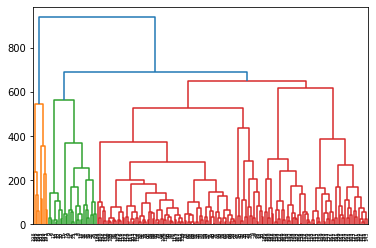

<ipython-input-68-f775c1b8b163>:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  avg_clustering = linkage(distance_matrix, method="average")


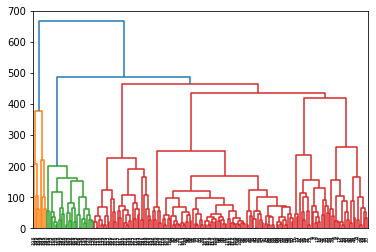

In [ ]:
single_clustering = linkage(distance_matrix, method="single")
dendrogram(single_clustering)
plt.show()
clustering = linkage(distance_matrix, method="ward")
dendrogram(clustering)
plt.show()
complete_clustering = linkage(distance_matrix, method="complete")
dendrogram(complete_clustering)
plt.show()
avg_clustering = linkage(distance_matrix, method="average")
dendrogram(avg_clustering)
plt.show()




K_MEAN CLUSTERING:

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


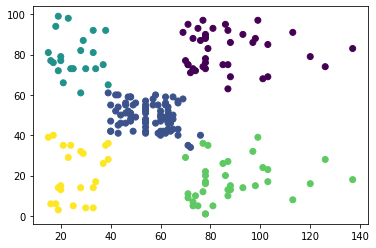

In [ ]:
x=FILE["Annual Income (k$)"]
y=FILE["Spending Score (1-100)"]
data = list(zip(x, y))
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
VALUE=kmeans.labels_
plt.scatter(x, y, c=kmeans.labels_)


#DB_SCAN:

In [ ]:
X=FILE["Annual Income (k$)"]
Y=FILE["Spending Score (1-100)"]

data = list(zip(X, Y))
X = StandardScaler().fit_transform(data)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [ ]:
SAMPLE_MASKING = np.zeros_like(db.labels_, dtype=bool)
SAMPLE_MASKING[db.core_sample_indices_] = True
labels = db.labels_


In [ ]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

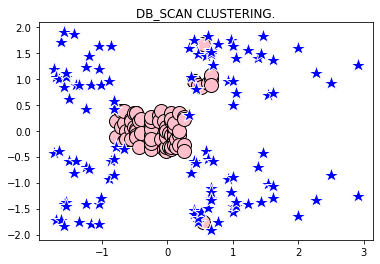

In [ ]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & SAMPLE_MASKING]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='pink',
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~SAMPLE_MASKING]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='red',
             markeredgecolor='w', markersize=6)
    plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor='blue',
             markeredgecolor='w', markersize=16)
    
plt.title("DB_SCAN CLUSTERING.")
plt.show()

#COMPARISION BETWEEN K_MEAN AND DB_SCAN:


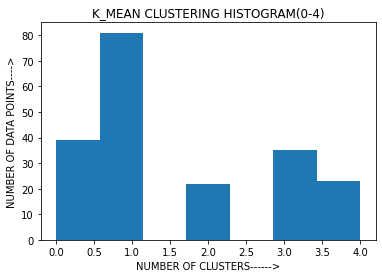

In [ ]:
plt.title("K_MEAN CLUSTERING HISTOGRAM(0-4)")
plt.xlabel("NUMBER OF CLUSTERS------>")
plt.ylabel("NUMBER OF DATA POINTS---->")
plt.hist(VALUE,7)
plt.show()

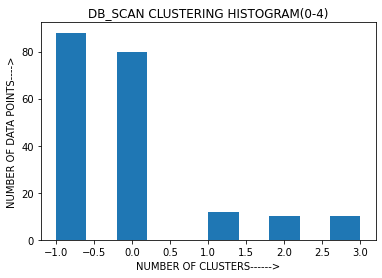

In [ ]:
plt.title("DB_SCAN CLUSTERING HISTOGRAM(0-4)")
plt.xlabel("NUMBER OF CLUSTERS------>")
plt.ylabel("NUMBER OF DATA POINTS---->")
plt.hist(labels,10)
plt.show()